# Page-Rank

## Auftrag
**Autor:** Gregor von Flüe  

Der Page-Rank Algorithmus ist ein Verfahren, wie viele verlinkter Dokumente anhand ihrer Struktur zu gewichten und zu bewerten. Dies war und ist eines der wichtigsten Konzepte, wie Google alle indizierten Webseiten bewertete. Der Algorithmus wurde in 1998 von Larry Page das erste Mal vorgestellt und patentiert. Er beschrieb eine Methode, wie jede Seite im World Wide Web eine Gewichtung zugewiesen wird, abhänging davonm, wie viel andere Seiten auf diese Seite verweisen. In dieser Semesterarbeit, wird zuerst die Theorie und mathematische Grundlagen hinter diesem Algorithmus erläutert und danach an einem Anwendungsbeispiel aufgezeigt.

### Umgebung
Damit die Snippets funktionieren, müssen die folgenden Python-Module installiert sein.

* NumPy [1]
* Matplotlib [2]
* NetworkX [3]

In [8]:
# pip install numpy

In [9]:
# pip install matplotlib

In [10]:
# pip install networkx

## Theorie
In diesem Kapitel wird der theoretische Teil aufgeführt, welcher für die Anwendungspeispiele relevant ist.

### Eigenwerte und Eigenvektoren
Der Page-Rank Algorithmus basiert auf dem Konzept von Eigenwerte und Eigenvektoren. Hinter den Eigenwerten und Egenvektoren steht die Eigenvektorgleichung, die wie folgt lautet:

$$A\vec{x}=\lambda\vec{x}$$

Wenn nun einen Vektor $\vec{x}$ existiert, welcher nicht der Nullvektor ist, dann muss die Gelichung mit dem Eigenwert $\lambda$ gültig sein. Die Eigenvektoren und Eigenwerte einer Matrix $A$ werden über das charakeristische Polynom berechnet. Das charakeristische Polynom $\chi(A) = det(A-\lambda E_n)$ ist ein Polynom vom Grad n mit höchstem Koeffizienten $(-1)^n$. Die Nullstellen des charakeristischen Polynoms sind die Eigenwerte von $A$. Die Eigenvektoren werden dannach über das Lösen des jeweiligen Eigenwertes des linearen Gleichungsystem bestimmt [4].  
Geometrisch gesehen, werden Eigenvektoren durch eine Transformatrix beeeinflusst, indem sie mit ihrem ensprechenden Eigenwert nur $\lambda$ skaliert. Es können keine anderwertige Transformationen durchgeführt werden. Eigenwerte werden dazu verwendet, um festzustellen, ob eine Matrix $A$ diagonalisierbar ist, den mit diagonaliserbarar Matrizen kann viel einfacher gerechnet werden. Da sich bei Diagonalmatrizen sich nur die Eigenwerte auf der Spur befinden.  
Mit den Eigenvektoren lässt sich eine Matrix $U$ und deren inverse $U^{-1}$ bestimmen. Die Matrix $U$ bestehen die einzelnen Spalten aus den berechnenten linearen unabhängigen Eigenvektoren. Dadurch lässt sich nun die Diagonalmatrix $D_A$ von der Matrix $A$ wie folgt berechnen:

$$D_A=U^{-1}*A*U$$

Eine Matrix $A$ ist genau dann Diagonalisierbar, wenn für jeden Eigenwert $\lambda$ vonä $A$ die algebraische Vielfacheit gleich seiner geometrischen Vielfachheit ist. Wodurch die algebraische Vielfachheit durch die Anzahl der male, wie oft die jeweilige Nullstelle $\lambda_j$ vorkommt. Die geometrische Vielfacheit ist die Anzahl an linear unabhängignen Eigenvektoren zu den Eigenwerten $\lambda$.

### Markov-Kette
Die Markov-Kette beschreibt eine Zustandstransformationsmatrix, welche das Ziel besitzt die Wahrscheinlichkeit für das Eintreten zukünftiger Ereignisse anzugeben. Dies wird mit der folgendne mathematischen Formel (erweiterte Eigenwertgleichung) beschreiben [4]:

$$\vec{x}(n+1)=A\vec{x}(n)$$

Bei der mathematischen Dahrstellung wird ein Vektor $\vec{s}$ verwendet um die aktuelle Wahrscheinlichkeit des Zustandes darzustellen. Mittels einer ($n\times n $)-Matrix $M$ wird die Wahrscheinlichkeit dargestellt mit der der aktuelle Zustand $\vec{x}$ in einen ander übergeht. Durch eine einfache Matrizenmultiplikation kann nun der aktuelle Zustand $\vec{x}(0)$ zu einem späteren Zeitpunkt berechnet werden (in der Praxis kann eine Iteration eine beliebige Zeiteinheit annehmen, welche ein Intervall einer Zustandsänderung beschreibt) [4].

$$\vec{x}(1)=M*\vec{x}(0)$$

Bei sehr vielen Iterationen wird die Berechnung des neuen Zustandes sehr aufwendig.

$$\vec{x}(n)=M*(M*(...*(M*\vec{x}(0))))$$

Allgemein lässt sich nun diese Problem vereinfachen, indem mit einer diagonaliserten Matrix $D_M$ $M^k$ berechnet wird, wobei $k$ durch die Anzahl an Iterationen gegeben ist. Dank den Eigenwerten und Eigenvektoren lässt sich eine Matrix $U$ und deren inverse $U^{-1}$ bestimmen (falls die Matrix $M$ diagonalisierbar ist) [4].

$$M^k=U*\begin{pmatrix}
\lambda_1^k & & \\
& ... & \\
& & \lambda_n^k \\
\end{pmatrix}*U^{-1}$$

Dadruch ergibt sich die vereinfachte Formel $\vec{s}(n)=M^n*\vec{s}(0)$, wenn $M$ die Matrix ist welcher ein Übergang von einem Zustand in den darauf folgenden beschreibt und $\vec{s}(0)$ der Anfangszstand.

# Grundprinzip Page-Rank
Das Konzept des Page-Rank's lässt sich am besten an einem Beispiel erläutern. Hierfür werden fünf Webseiten $W_1$ bis $W_5$ betrachtet, welche die folgende Adjazenzmatrix besitzen:

$$M = \begin{array}{cc} & 
\begin{array}{ccccc} W_{1} & W_{2} & W_{3} & W_{4} & W_{5} \end{array} \\
\begin{array}{c} 
W_{1} \\ 
W_{2} \\ 
W_{3} \\ 
W_{4} \\ 
W_{5} 
\end{array} & \left 
(\begin{array}{ccccc} 
0 & \quad 0 & \quad 0 & \quad 0 & \quad 0 \\ 
1 & \quad 0 & \quad 0 & \quad 1 & \quad 0 \\
1 & \quad 1 & \quad 0 & \quad 1 & \quad 1 \\
1 & \quad 0 & \quad 0 & \quad 0 & \quad 0 \\
0 & \quad 0 & \quad 0 & \quad 1 & \quad 0  
\end{array}\right) 
\end{array}$$  

Aus der Adjazenzmatrix kann ein gerichteter Graph erstellt werden, wobei jeweils ein Pfile in diesem Beispiel ein Hyperlink auf die jeweilge Webseite darstellt. Sommit besitzt die Webseite $W_1$ drei Hyperlinks, die auf die folgenden Webseiten $W_2$, $W_3$ und $W_4$ zeigen.  
Das Grundprinzip des Page-Rank besteht darin, dass jede Webseite ihre Stimme für die anderen Webseiten abgeben kann, indem sie die andere Webseite in einem Hyperlink erwähnt. Je mehr Webseiten auf eine andere bestimmte Webseite verweisen, desto höher wird diese Webseite geordnet. In der folgenden Abbildung zeigt sich dies durch die grösse des Nodes. Desto mehr Webseiten auf eine bestimmte Webseite zeigen, desto grösser erscheint der jeweilge Node in der Grafik [3][5].

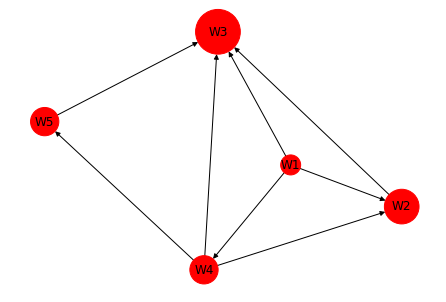

In [69]:
"""
Snippet welches ein gerichteten Graph anhand der Adjenzmatrix G generiert.
"""


import networkx as nx 

G = nx.DiGraph()
G.add_edges_from([
    ('W1', 'W2'), ('W1', 'W3'), ('W1', 'W4'), 
    ('W2', 'W3'), 
    ('W4', 'W2'), ('W4', 'W3'), ('W4', 'W5'),
    ('W5', 'W3')
])

d = dict(G.in_degree)
nx.draw(G, node_size=[(n + 1) * 400 for n in d.values()], with_labels=True, node_color='r')

Wird diese Situation nun in eine Gleichung zur Berechnung des Gewichtes einer bestimmten Seite umgeformt, so ergibt ssich die folgende Gleichung:

$$w_i=\sum_{j=1}^{n}M_{ji}$$

Jedoch wäre dieses Verhalten sehr einfach zu manipulieren, indem andere Webseiten erstellt werden, welche nur den Zweck haben, auf die Webseite zu referenzieren, bei der eine gute Bewertung möchte. Um diesen Fehler zu beheben, wird jeder Seite eine Gesamtbewertung von Eins gegeben, die sie gleichmössig auf alle ausgehenden Links verteilt.

$$w_i=\sum_{j=1}^{n}\frac{M_{ji}}{n_j}$$

Der Wert $n_j$ repräsentiert die inks auf ser Seite $j$. Auf Seiten mit tausenden von Links ist ein Hyperlink weniger wert als ein Hyperlink von Webseiten mit unter hundert Links. Nun besteht noch die Möglichkeit mehrere Webseiten mit nur einem Hyperlink zu erstellen, welche wiederum alle auf die eine Webseite zeigen, welche eine gute Bewertung erhalten soll. Um dieses Problem zu minimieren, wird die Gleichung mit dem Gewicht der Ausgabeseite selbst erweitert.

$$w_i=\sum_{j=1}^{n}\frac{M_{ji}}{n_j}*w_j$$

Diese Änderung bedeutet, je beliebter eine Webseite ist, desto höher ist der Wert der Stimme, die diese Webseite an anderen Webseiten gibt. Jedoch erzeugt diese Formel eine zirkuläre Abhängigkeit, weil das Gewicht $w_i$ von einem anderen Gewicht $w_j$ berechnet wird und das Gewicht $w_j$ selbst wiederum von einem anderen Gewicht [4].  

Da sich das Gewicht der Webseiten nach einer gewissen Anzahl von Iterationen stabilisiert und somit nicht mehr verändert, spielt insovern die Gewinchtung zu Beginn keine grosse Rolle, insofern alle Seite die gleiche Startgewichtung erhalten. Somit beginnt jede Webseite mit dem Anfangsgewicht von Eins und wird dann in einer Markov-Kette entwicklet, um das effektive Gewicht iterativ zu entwickeln. Somit ist der Ausgangszustand wie folgt definiert:

$$A\vec{w}=\lambda \vec{w}, \lambda=1$$

Nun können die ensprechenden Eigenvektoren zum Eigenwert $\lambda=1$ berechnen und danach das lineare Gelichungssystem auflösen. Wobei dies nicht so einfach ist. Den in der realität gibt es fast unabzählbar viele Webseiten. Was bedeutet, dass ein Computersystem von heute diese Aufgabe nicht in einer absehbaren Zeit lösen beziehungsweise berechnen kann.  Stattedess werden Approximationen durchgeführt für die Iterationen, welche mit der Markov-Kette erzeut werden.  


## Implementierung
Die Implementierung der zwei Projektionsvarianten wird in drei Teile aufgeteilt. Zu Beginn wird eine Klasse `Parallelepiped` geschrieben, welche anhand eines Eckpunktes und drei Kantenvektoren die restlichen Kooridnaten des Parallelepipeds berechnet. Des Weiteren kann diese Klasse ein Parallelpiped aus allen Eckpunkten erstellen. Danach wird eine Methode `grafik_zeichnen` geschrieben, welche ein Parallelepiped-Objket und dessen Projektion grafisch darstellt. Zum Schluss werden die zwei Projektionsmethoden `parallelprojektion` und `zentralprojektion` geschrieben, welche die vorherigen Kapitel beschriebenen Projektionen durchführen.

### Parallelepiped
Im darauffolgenden Snippet ist der Code der Klasse `Parallelepiped` vorzufinden.

## Anwendungsbeispiele


### Parallelprojektion
Alle roten Punkte des türkisen Körper liegen auf der xy-Ebene. Das blaue Parallelepiped wird sozusagen auf die xy-Ebene mit der Richtung $\vec{r}$ gedrückt. Bei deinem Richtungsvektor $\vec{r}=\begin{pmatrix}
0 \\
0 \\
1 \\
\end{pmatrix}$ sieht man das Parallelepiped so, wie wenn der Beobachter genau davor steht. Dies ist in der folgenden Abbildung ersichtlich.

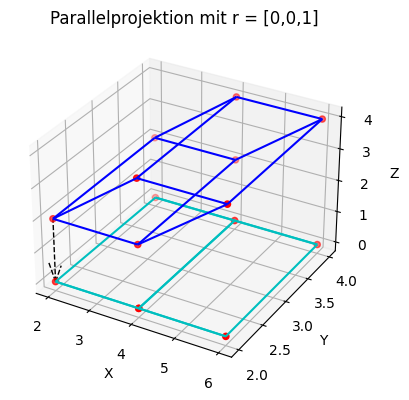

In [7]:
parallelprojektion(Parallelepiped(), np.array([0,0,1]))

## Fazit
An einem Parallelepiped eine Parallel- und Zentralprojektion durchzuführen war eine ansprechende und interessante Aufgabe. Dadurch konnten die Lernziele des Blockes sehr gut vertieft werden.  
Matplotlib ist wie bei der 2D-Visualisierung auch bei der 3D-Visualisierung ein geeignetes Tool, mit welchem einfach und schnell erste Grafiken erzeugt werden können.

## Literaturverzeichnis
[1] NumPy Developers. (2020). NumPy. Abgerufen am 24.11.2020 von https://numpy.org/  
[2] Matplotlib Developers. (2020). Matplotlib. Abgerufen am 24.11.2020 von https://matplotlib.org/  
[3] NetworkX Developers. (2020). NetworkX. Abgerufen am 24.11.2020 von https://networkx.org/  
[4] G. Teschl, S. Teschl. (2014) Mathematik für Informatiker. Springer-Verlag Berlin Heidelberg. 
[5] S. Ceri, A. Bozzon, M. Brambilla, E. Della Valle, P. Fraternali, S. Quarteroni. (2013) Web Information Retrieval. Springer-Verlag Berlin Heidelberg.  